In [ ]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
%matplotlib inline
np.random.seed(42)

In [ ]:
# set parameters:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

print('Loading data...')
(x, y), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 40% del dataset para validación
validation = 0.40
N_validation_split = int(x.shape[0]*(1-validation))
print(N_validation_split)

# Training Set
x_train = x[:N_validation_split]
y_train = y[:N_validation_split]

# Cross Validation Set
x_test = x[N_validation_split:]
y_test = y[N_validation_split:]

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('Build model...')
model = Sequential()
# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,embedding_dims,input_length=maxlen))
model.add(Dropout(0.2))
# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,kernel_size,padding='valid',activation='relu',strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())
# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))
# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("accuracy: ", score[1])

In [ ]:
weights = model.get_weights()[0]
biases = model.get_weights()[1]
print("Pesos :" , weights.shape)
print("Biases : " , biases)

In [ ]:
from keras.callbacks import ModelCheckpoint
from fnn_helper import PlotLosses
checkpointer = ModelCheckpoint(filepath='model_3.imdb.hdf5', verbose=1, save_best_only=True)
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_train , y_val_categorical=y_train)

model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs, validation_data=(x_test, y_test),callbacks=[plot_losses, checkpointer],)

In [3]:
from __future__ import print_function
import numpy as np
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional,Activation
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer


max_features = 1000 
# cut texts after this number of words
# (among top max_features most common words)
maxlen = 400
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

#print('Pad sequences (samples x time)')
#x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
#x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
#print('x_train shape:', x_train.shape)
#print('x_test shape:', x_test.shape)
#y_train = np.array(y_train)
#y_test = np.array(y_test)

tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train.shape)
print(x_test.shape)

x_train[0]
# One-hot encoding the output

num_classes = 2
y_train_categorical = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)
print(y_train_categorical.shape)
print(y_test_categorical.shape)

Loading data...
25000 train sequences
25000 test sequences
(25000, 1000)
(25000, 1000)
(25000, 2)
(25000, 2)


In [4]:
from fnn_helper import PlotLosses
from keras import optimizers
from keras.layers import Activation, Dense

plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None , x_val=x_test, y_val_categorical=y_test_categorical)

model = Sequential()
model.add(Embedding(max_features,50,input_length=maxlen))
model.add(Dropout(0.5))
optim_adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#optim_RMSprop = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
#optim_SGD = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.add(Activation(optim_adam))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

print('Train...')
model.fit(x_train, y_train_categorical,
          batch_size=batch_size,
          epochs=50,
          validation_data=[x_test, y_test_categorical],
          callbacks=[plot_losses],)

ValueError: ('Could not interpret activation function identifier:', <keras.optimizers.Adam object at 0x000002289CDF89E8>)

In [12]:
# LSTM and CNN for sequence classification in the IMDB dataset
import numpy
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.core import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
#top_words = 5000
top_words = 1000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

num_classes = 2
y_train_categorical = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)
print(y_train_categorical.shape)
print(y_test_categorical.shape)


(25000, 2)
(25000, 2)


In [13]:
from fnn_helper import PlotLosses
plot_losses1 = PlotLosses(plot_interval=1, evaluate_interval=None , x_val=X_test, y_val_categorical=y_test_categorical)

In [18]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(250, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train_categorical, epochs=3, batch_size=64, verbose=2, callbacks=[plot_losses1],)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test_categorical, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 500, 32)           32000     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 250)               25250     
_________________________________________________________________
dropout_9 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 502       
Total para

InvalidArgumentError: Node 'dropout_9/cond/Switch': Unknown input node 'dropout_1/keras_learning_phase'

In [ ]:
from matplotlib import pyplot as plt

scores = model.evaluate(X_test, y_test_categorical, verbose=2)
print("Accuracy: %.2f%%" % (scores[1] * 100))

weights = model.get_weights()[0]
biases = model.get_weights()[1]
print(weights.shape)
print(biases)

plt.hist(weights.flatten(), 100)
plt.show()

In [17]:
batch_size=32
#epochs=20
epochs=8
model.fit(X_train, y_train_categorical,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=[X_test, y_test_categorical],
          callbacks=[plot_losses1],)

Train on 25000 samples, validate on 25000 samples
Begin training
Epoch 1/8


InvalidArgumentError: Node 'group_deps_1': Unknown input node '^mul_4'

In [ ]:
# Nuevo modelo 
def get_model_4():
    input_shape=2
    output_size=1
    hidden_units= 10
    lr=2
    decay=0.0
    model = Sequential()
    sgd = optimizers.SGD(lr=lr, decay=decay)
    model.add(Dense(hidden_units,input_dim=input_shape,  activation='sigmoid', ))
    model.add(Dense(output_size, 
                    activation='sigmoid', 
                    kernel_initializer='zeros', 
                    name='Salida'
                   ))
    model.compile(loss = 'binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

model_4 = get_model_4; 

In [20]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

# set parameters:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)


In [27]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Build model...


In [28]:
print("Entrenando Modelo ...")
from fnn_helper import PlotLosses
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None , x_val=X_test, y_val_categorical=y_test)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test),
          callbacks=[plot_losses])

Entrenando Modelo ...
Begin training


InvalidArgumentError: Node 'dropout_18/cond/Switch': Unknown input node 'dropout_1/keras_learning_phase'

In [9]:
## PRUEBA 3  ##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling1D
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D, AveragePooling1D
from keras.callbacks import EarlyStopping
from keras.layers.normalization import BatchNormalization
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.layers.wrappers import TimeDistributed
from keras.preprocessing.text import Tokenizer
from keras.callbacks import Callback
from keras.optimizers import *

# no bigrams - define maxlen
max_features = 1000
print('Loading data...')
(X, y), (X_test, y_test) = imdb.load_data(num_words=max_features)

# 40% del dataset para validación
validation = 0.40
N_validation_split = int(X.shape[0]*(1-validation))
print(N_validation_split)

# Training Set
X_train = X[:N_validation_split]
y_train = y[:N_validation_split]

# Cross Validation Set
X_test = X[N_validation_split:]
y_test = y[N_validation_split:]

maxlen = 400
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Populating the interactive namespace from numpy and matplotlib
Loading data...


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy', 'get']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


15000
Pad sequences (samples x time)
X_train shape: (15000, 400)
X_test shape: (10000, 400)


In [41]:
from keras.callbacks import History

def get_model(max_features, embedding_dims, maxlen, optimizer):
    model = Sequential()
    model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(1, activation='sigmoid'))
    
    if optimizer == 'adam':
        optim = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    elif optimizer == 'rmsprop':
        optim = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    elif optimizer == 'sgd':
        optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy'])
    print(model.summary())
    return model


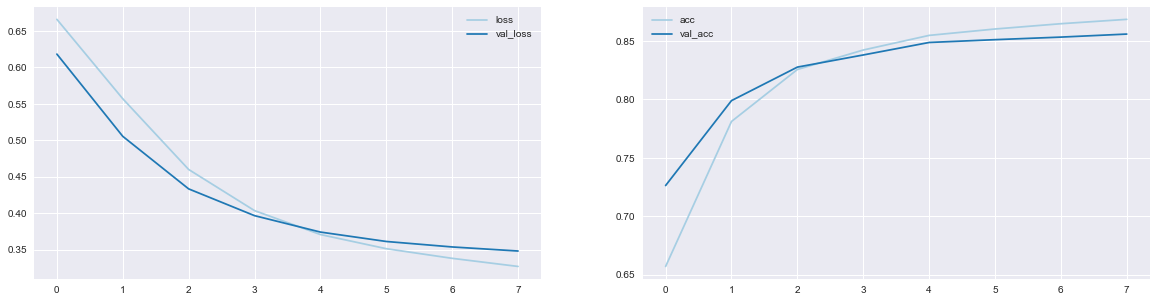

Epoch 00007: val_loss improved from 0.35356 to 0.34798, saving model to model.imdb.hdf5
15000/15000 [==============================] - 27s - loss: 0.3268 - acc: 0.8686 - val_loss: 0.3480 - val_acc: 0.8560


AttributeError: 'History' object has no attribute 'history'

In [42]:
# Entrenar el modelo 
from keras.callbacks import ModelCheckpoint 
import matplotlib.pyplot as plt
from fnn_helper import PlotLosses

## Callback para graficar
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
## Callback para guardar pesos
checkpointer= ModelCheckpoint(filepath='model.imdb.hdf5', verbose=1, save_best_only=True)

# Use different optimization methods
loss_optims = []
for opt in ['adam', 'rmsprop', 'sgd']:
    model = get_model(max_features=20000, embedding_dims=50, maxlen=maxlen, optimizer=opt)
    model.fit(X_train, y_train, batch_size=32, epochs=8, 
              validation_data=(X_test, y_test), callbacks=[plot_losses,checkpointer])


In [45]:
# Listo los resultados del modelo
score = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", score[0])
print("accuracy: ", score[1])

train_loss:  []
val_loss:  []
acc:  []
val_acc:  []
loss:  0.347977899051
accuracy:  0.856


In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
#from ggplot import *

def smooth(x,window_len=11, window='flat'):
    s = np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]

    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')
        
    y = np.convolve(w / w.sum(), s, mode='valid')
    return y


In [24]:
from statsmodels.nonparametric.smoothers_lowess import lowess
sns.set_palette("Paired")
opts = ['adam', 'rmsprop', 'sgd']

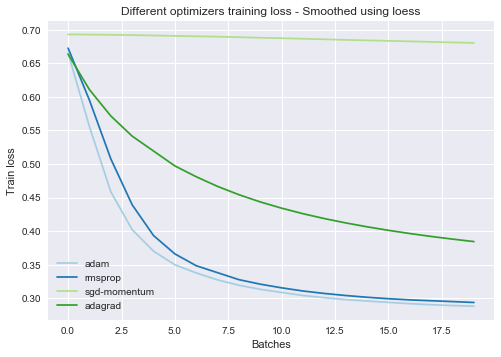

In [25]:
for i in range(len(opts)):
    y = train_loss[i]
    x = np.arange(0, len(y))
    filtered = lowess(y, x, frac=0.2, it=3, delta=0.0, 
                  is_sorted=True, missing='drop', return_sorted=True)
    plt.plot(filtered[:,1], label=opts[i])

plt.xlabel('Epochs')
plt.ylabel('Train loss')
plt.title('Comparacion optimizers training loss')
plt.legend(loc="lower left")

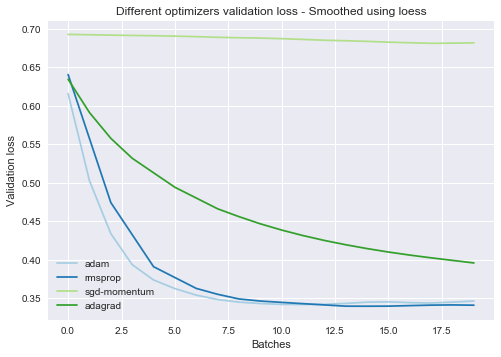

In [26]:
for i in range(len(opts)):
    y = val_loss[i]
    x = np.arange(0, len(y))
    filtered = lowess(y, x, frac=0.2, it=3, delta=0.0, 
                  is_sorted=True, missing='drop', return_sorted=True)
    plt.plot(filtered[:,1], label=opts[i])

plt.xlabel('Batches')
plt.ylabel('Validation loss')
plt.title('Different optimizers validation loss - Smoothed using loess')
plt.legend(loc="lower left")

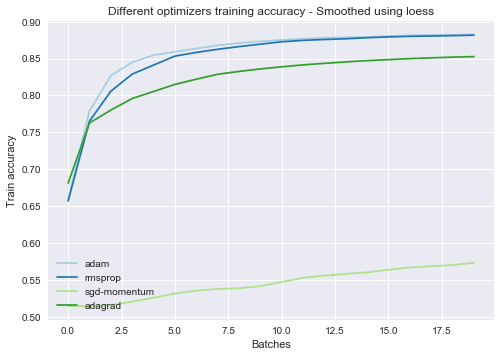

In [27]:
for i in range(len(opts)):
    y = acc[i]
    x = np.arange(0, len(y))
    filtered = lowess(y, x, frac=0.2, it=3, delta=0.0, 
                  is_sorted=True, missing='drop', return_sorted=True)
    plt.plot(filtered[:,1], label=opts[i])

plt.xlabel('Batches')
plt.ylabel('Train accuracy')
plt.title('Different optimizers training accuracy - Smoothed using loess')
plt.legend(loc="lower left")

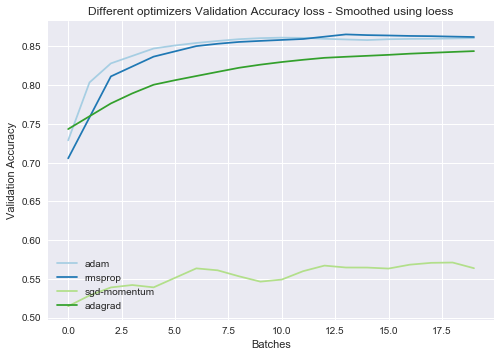

In [28]:
for i in range(len(opts)):
    y = val_acc[i]
    x = np.arange(0, len(y))
    filtered = lowess(y, x, frac=0.2, it=3, delta=0.0, 
                  is_sorted=True, missing='drop', return_sorted=True)
    plt.plot(filtered[:,1], label=opts[i])

plt.xlabel('Batches')
plt.ylabel('Validation Accuracy')
plt.title('Different optimizers Validation Accuracy loss - Smoothed using loess')
plt.legend(loc="lower left")